# Case Estágio em Data Science

### Problema:

_Você recebeu uma demanda de que as taxas de juros emitidas estão tendo um
comportamento estranho, e que você como cientista de dados precisa verificar se
__realmente ocorreram__ e garantir que comportamentos anômalos sejam __automaticamente
detectados__ no futuro._

 ### Suposições:
_`1. Os dados fornecidos são fictícios (não é necessário relacionar eventos reais aos dados).`_ <br>
_`2. Os dados são suficientes para resolver o problema (não é necessário buscar dados de outros períodos de tempo para comparar).`_

## Importamos as bibliotecas e os dados.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson

`O dataset foi divido nas variáveis x e Y, além da criação de X, que converte, em ordem crescente, cada dia num número entre 1 e 177 para utilização nas análises.`

In [2]:
data = pd.read_csv('data.csv')
x = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
X = np.linspace(1, len(Y), num = len(Y), endpoint=True)
data.describe()

,mean_interest_rate
count,177.000000
mean,10.793759
std,0.665288
min,8.448033
25%,10.356839
50%,10.661367
75%,11.421789
max,12.055814


## Visualização dos Dados
`Para podermos visualizar os dados, uma visualização da taxa de juros ao longo do tempo é gerada e também um histograma para se ter uma ideia da forma da distribuição dos dados.`

Text(0, 0.5, 'Juros [%]')

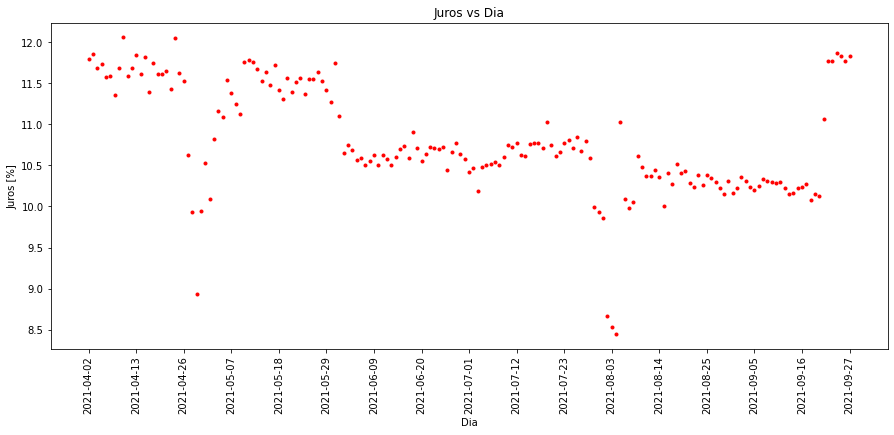

In [3]:
plt.figure(figsize=(15,6))
plt.scatter(x,Y, color = 'red', marker = '.')
plt.xticks([0, 11, 22, 33, 44, 55, 66, 77, 88, 99 , 110, 121, 132, 143, 154, 165, 176], rotation = 90)
plt.title('Juros vs Dia')
plt.xlabel('Dia')
plt.ylabel('Juros [%]')

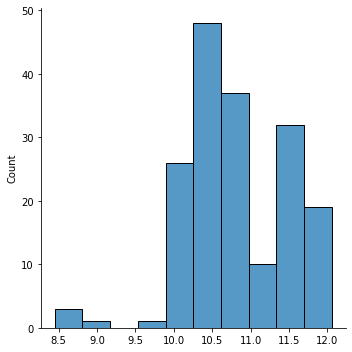

In [4]:
sns.displot(Y)

## Teste de normalidade

__Hipótese nula (H0): Os dados seguem uma distribuição normal. <br>
Hipótese alternativa (HA): Os dados não seguem uma distribuição normal.__

`A hipótese H0 é testada, utilizando um plot QQ para análise visual e também o método de D'Agostino e Pearson, usando p = 5%.`

H0 pode ser rejeitada, p =  0.029386827190293348 e a distribuição não será considerada normal.


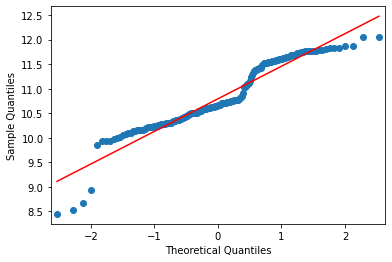

In [5]:
fig = sm.qqplot(Y, line='s')
k2, p = stats.normaltest(Y)
alpha = 0.05
if p < alpha:
    print('H0 pode ser rejeitada, p = ', p, 'e a distribuição não será considerada normal.')
else:
    print('H0 não pode ser rejeitada, p = ', p, 'e a distribuição será considerada normal.')
    

## Sobre a normalidade

`Com H0 rejeitada, não é possível utilizar o método dos 3 desvios padrões ou do boxplot, pois esses métodos assumem normalidade dos dados. Com isso, vamos tentar utilizar os métodos de regressão linear e polinomial. Por ter apenas uma variável independente, não será necessário analisar a colinearidade. Vamos utilizar as quatro hipóteses da regressão linear, que são:` <br>
<br>
__`1. Relação Linear`__ <br>
    `A hipótese de relação linear não será numericamente testada, vamos apenas usar o gráfico para uma análise qualitativa e o R² como um indicador indireto do fit dos dados com a reta que melhor se adequa. Não será necessário uma análise de erro médio quadrado ou R² ajustado pois só temos uma variável independente.` <br>
    <br>
__`2. Independência`__ <br>
    `Para analisar a independência de resíduos, vamos utilizar o teste de Durbin-Watson, onde:` <br>
    _`H0: Não há correlação entre resíduos. (1.5 < DW < 2.5)
    HA: Há correlação entre resíduos.`_ <br>
<br>
__`3. Normalidade`__ <br>
    `Vamos novamente usar o plot QQ e fazer um teste de normalidade utilizando a função normaltest, mas dessa vez para os resíduos, com p = 5%.` <br>
    _`Hipótese nula (H0): Os resíduos seguem uma distribuição normal.
    Hipótese alternativa (HA): Os resíduos não seguem uma distribuição normal.`_ <br> 
<br>
__`4. Homoscedasticidade`__ <br>
    `Vamos utilizar o teste de Levene, que é uma alternativa ao teste de Bartlett para casos onde há desvios significativos da normalidade. p = 5% e as hipóteses são:` <br>
    _`H0: Todos os resíduos são de populações com variâncias iguais.
    HA: Os resíduos são de populações com variâncias diferentes.`_  

### Regressão Linear

In [6]:
X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X.reshape(-1, 1), Y, test_size = 0.2,
                                                                        random_state = 0)

lin_regressor = LinearRegression()
lin_regressor.fit(X_train_lin, Y_train_lin)

Y_pred_lin = lin_regressor.predict(X_test_lin)

#### 1. Relação Linear

R² = 0.43617583226837875


Text(0, 0.5, 'Juros [%]')

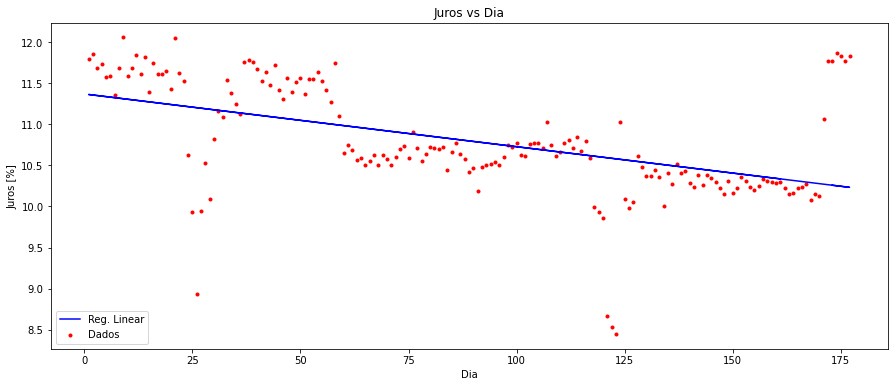

In [7]:
print('R² =', r2_score(Y_test_lin, Y_pred_lin))
plt.figure(figsize = (15,6))
plt.scatter(X,Y, color = 'red', marker = '.', label = 'Dados')
plt.plot(X_train_lin, lin_regressor.predict(X_train_lin), color = 'blue', label = 'Reg. Linear')
plt.legend()
plt.title('Juros vs Dia')
plt.xlabel('Dia')
plt.ylabel('Juros [%]')

#### 2. Independência

In [8]:
DW = durbin_watson(lin_regressor.predict(X_train_lin))
if DW > 2.5 or DW < 1.5:
    print('H0 pode ser rejeitada, DW = ', DW, 'e há correlação entre resíduos.')
else:
    print('H0 não pode ser rejeitada, DW = ', DW, 'e não há correlação entre resíduos.')

H0 pode ser rejeitada, DW =  0.0019611691044510346 e há correlação entre resíduos.


#### 3. Normalidade

H0 pode ser rejeitada, p =  8.237775795604559e-08 e a distribuição não será considerada normal.


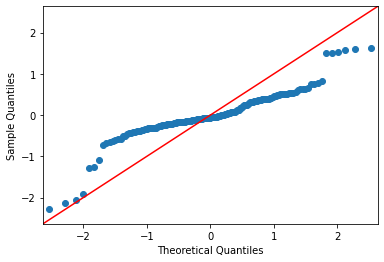

In [9]:
Y_reordered_total = np.append(Y_train_lin, Y_test_lin)
Y_pred_total = np.append(lin_regressor.predict(X_train_lin), Y_pred_lin)
r1 = Y_reordered_total - Y_pred_total
fig = sm.qqplot(r1, line='45')
k2, p = stats.normaltest(r1)

alpha = 0.05
if p < alpha:
    print('H0 pode ser rejeitada, p = ', p, 'e a distribuição não será considerada normal.')
else:
    print('H0 não pode ser rejeitada, p = ', p, 'e a distribuição será considerada normal.')

#### 4. Homoscedacidade

In [10]:
W, p = stats.levene(r1, Y_pred_total)

alpha = 0.05
if p < alpha:
    print('H0 pode ser rejeitada, p = ', p, 'e todos os resíduos não são de populações com variâncias iguais.')
else:
    print('H0 não pode ser rejeitada, p = ', p, 'e todos os resíduos são de populações com variâncias iguais.')

H0 pode ser rejeitada, p =  0.017572255921901776 e todos os resíduos não são de populações com variâncias iguais.


### Regressão Polinomial

`Aqui, a única diferença em relação à regressão linear é que a primeira hipótese é de que a relação entre X e Y pode ser representada por um polinômio ao invés de uma reta. Vamos aos testes:`

In [11]:
X_train_pol, X_test_pol, Y_train_pol, Y_test_pol = train_test_split(X, Y, test_size = 0.2, random_state = 0)

poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X_train_pol.reshape(-1,1 ))
pol_regressor = LinearRegression()
pol_regressor.fit(X_poly, Y_train_pol)

Y_pred_pol = pol_regressor.predict(poly_reg.transform(X_test_pol.reshape(-1,1 )))
np.set_printoptions(precision=2)

#### 1. Relação Polinomial

R² = 0.4885987302149103


Text(0, 0.5, 'Juros [%]')

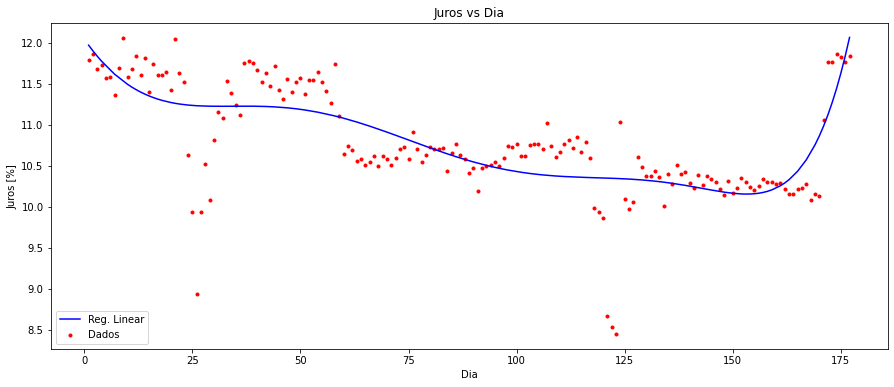

In [12]:
print('R² =', r2_score(Y_test_pol, Y_pred_pol))

X_train_pol.sort()
plt.figure(figsize = (15,6))
plt.scatter(X,Y, color = 'red', marker = '.', label = 'Dados')
plt.plot(X_train_pol, pol_regressor.predict(poly_reg.fit_transform(X_train_pol.reshape(-1,1))),
         color = 'blue', label = 'Reg. Linear')
plt.legend()
plt.title('Juros vs Dia')
plt.xlabel('Dia')
plt.ylabel('Juros [%]')

#### 2. Independência

In [13]:
DW = durbin_watson(pol_regressor.predict(poly_reg.fit_transform(X_train_pol.reshape(-1,1))))
if DW > 2.5 or DW < 1.5:
    print('H0 pode ser rejeitada, DW = ', DW, 'e há correlação entre resíduos.')
else:
    print('H0 não pode ser rejeitada, DW = ', DW, 'e não há correlação entre resíduos.')

H0 pode ser rejeitada, DW =  2.288213804975556e-05 e há correlação entre resíduos.


#### 3. Normalidade

H0 não pode ser rejeitada, p =  0.5929773081833438 e a distribuição será considerada normal.


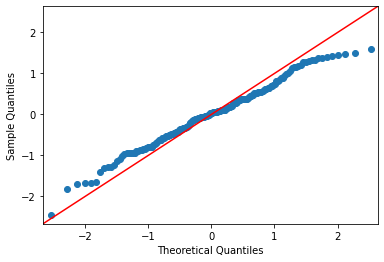

In [14]:
Y_reordered_total_pol = np.append(Y_train_pol, Y_test_pol)
Y_pred_total_pol = np.append(pol_regressor.predict(poly_reg.fit_transform(X_train_pol.reshape(-1,1))), Y_pred_pol)
r2 = Y_reordered_total_pol - Y_pred_total_pol
fig = sm.qqplot(r2, line='45')
k2, p = stats.normaltest(r2)

alpha = 0.05
if p < alpha:
    print('H0 pode ser rejeitada, p = ', p, 'e a distribuição não será considerada normal.')
else:
    print('H0 não pode ser rejeitada, p = ', p, 'e a distribuição será considerada normal.')

#### 4. Homoscedasticidade

In [20]:
W, p = stats.bartlett(r2, Y_pred_total_pol)

alpha = 0.05
if p < alpha:
    print('H0 pode ser rejeitada, p = ', p, 'e todos os resíduos não são de populações com variâncias iguais.')
else:
    print('H0 não pode ser rejeitada, p = ', p, 'e todos os resíduos são de populações com variâncias iguais.')

H0 pode ser rejeitada, p =  2.2206486471482665e-09 e todos os resíduos não são de populações com variâncias iguais.


### Sobre o método da Regressão

`Com, esses testes, podemos perceber que as suposições necessárias para regressão linear foram negadas nos testes de independência, normalidade e homoscedacidade e que as suposições da regressão polinomial foram negadas nos testes de independência e homoscedacidade. Além disso, ambas tiveram um R² relativamente baixo, incluindo a regressão polinomial de 7º grau, que foi a que teve melhor resultado nessa métrica. Portanto, essas modelagens não são eficazes para modelar esses dados.` <br>


## Isolation Forest

`Para utilizar o Isolation Forest, as únicas suposições necessárias são de que as anomalias são poucas e diferentes, e esse é o caso. Assim, vamos recorrer a esse método, que é um método amplamente utilizado para detecção de anomalias. Esse método requer que o usuário forneça ao algoritmo o percentual de contaminação do dataset de treino para que ele possa estimar as regiões anômalas. Analisando o gráfico de dispersão, os 3 pontos de valor mais baixo são os que parecem fugir ao padrão, então será usado contamination = 3/177, como uma estimativa inicial.`

Text(0.5, 0, 'Juros [%]')

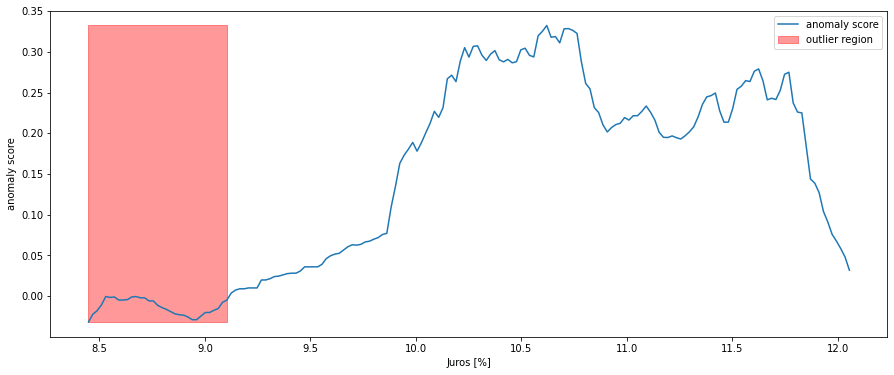

In [16]:
isolation_forest = IsolationForest(n_estimators = 100, contamination = 3/177, random_state = 1)
isolation_forest.fit(Y.reshape(-1, 1))
xx = np.linspace(Y.min(), Y.max(), len(data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (15,6))
plt.plot(xx, anomaly_score, label = 'anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where = outlier == -1, color = 'r', 
                 alpha = .4, label = 'outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Juros [%]')

In [17]:
print(anomaly_score)
print(xx.T[0])

[-0.03 -0.02 -0.02 -0.01 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.02 -0.02 -0.02 -0.02 -0.02 -0.03
 -0.03 -0.03 -0.02 -0.02 -0.02 -0.02 -0.02 -0.01 -0.    0.    0.01  0.01
  0.01  0.01  0.01  0.01  0.02  0.02  0.02  0.02  0.02  0.03  0.03  0.03
  0.03  0.03  0.04  0.04  0.04  0.04  0.04  0.05  0.05  0.05  0.05  0.06
  0.06  0.06  0.06  0.06  0.07  0.07  0.07  0.07  0.08  0.08  0.11  0.13
  0.16  0.17  0.18  0.19  0.18  0.19  0.2   0.21  0.23  0.22  0.23  0.27
  0.27  0.26  0.29  0.31  0.29  0.31  0.31  0.3   0.29  0.3   0.3   0.29
  0.29  0.29  0.29  0.29  0.3   0.3   0.3   0.29  0.32  0.33  0.33  0.32
  0.32  0.31  0.33  0.33  0.33  0.32  0.29  0.26  0.25  0.23  0.23  0.21
  0.2   0.21  0.21  0.21  0.22  0.22  0.22  0.22  0.23  0.23  0.23  0.22
  0.2   0.19  0.19  0.2   0.19  0.19  0.2   0.2   0.21  0.22  0.24  0.24
  0.25  0.25  0.23  0.21  0.21  0.23  0.25  0.26  0.26  0.26  0.28  0.28
  0.26  0.24  0.24  0.24  0.25  0.27  0.27  0.24  0.2

`Analisando o gráfico e comparando os vetores acima, podemos ver que o limite inferior do intervalo é aproximadamente 9,1, enquanto o superior é aproximadamente 12,1. Assim, esse é o intervalo onde um valor será considerado como dentro do esperado, e fora disso, uma anomalia. Abaixo, uma função que detecta esses valores e as datas em que ocorrem.`

In [18]:
def detect_anomalia(dataset):
    anomalias = []
    dias_anomalos = []
    count = 0
    
    for outlier in Y:
        if outlier > 12.1 or outlier < 9.1:
            anomalias.append(outlier)
            
    while count < len(x):
        for i in anomalias:
            if Y[count] == i:
                dias_anomalos.append(x[count])
        count = count + 1
        
    return anomalias, dias_anomalos

In [19]:
anomalias, dias_anomalos = detect_anomalia(data)
print(anomalias)
print(dias_anomalos)

[8.933653846, 8.672496972, 8.530741672, 8.448032684]
['2021-04-29', '2021-08-02', '2021-08-03', '2021-08-04']


`Podemos notar que são 4 valores anômalos. Isso faz sentido de acordo com o que foi usado como input no Isolation Forest, pois a contaminação é uma estimativa e não um valor exato.`

# Conclusão

`Ocorreram comportamentos anômalos` __`sim`__`, nos dias 2021-04-29, 2021-08-02, 2021-08-03 e 2021-08-04. Para detecção de anomalias no futuro, basta utilizar a função `__`detect_anomalia().`__